# Exercise 7 - Curse of dimensionality 

This exercise will focus on the curse of dimensionality, hence how non-relevant features worsen our model predictions.

#### Contact

As always if you have any questions regarding the notebook or the course, please contact:

David Steyrl: david.steyrl@univie.ac.at 

And please ask questions in the forum so we can answer them directly or pick them up in a Q&A :)


## 1. Preparing the data

We use the wine quality data set in this exercise. As usual, we try to predict the wine quality from a battery of wine metrics, e.g. residual sugar, citric acid, etc.

In [3]:
# Import packages that we will need in the exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor#, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split

In [4]:
# Import wine quality data from .csv file
df_wine = pd.read_csv('winequality-white.csv', sep=";", header=0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Check for missing values 
df_wine.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2. Adding random dimensions

We will now test what happens if we add random dimensions to our data set. We do this by adding extra columns of random values to our dataframe.

In [6]:
# Why?
#Since we will change our dataframe, we first create a copy, so our original df_wine stays as it is
df_wine_noise = df_wine.copy() # Q: Why and where do we change the dataframe # Q: is noise just a random name?

# Create random data (size: length of dataframe x, as many dimensions as we want)
random_data = np.random.randn(len(df_wine_noise), 5) # you can change the second value, we use 5 for now
                                                    # Q: 5 = dimension? What does that mean? = Rows
                                                    # Q: sind es immer automatisch so viele Zeilen wie die Daten mit denen man es zusammenfügt? = len...

# Turn the random data into a df, so we can afterwards call the function 'df.join' on it
random_data = pd.DataFrame(random_data)  # Q: data frame = column and rows? 

# Add the created data with random values to the dataframe
df_wine_noise = df_wine_noise.join(random_data)

# Convert the columnnames to strings
df_wine_noise.columns = df_wine_noise.columns.astype(str)

We can see the extra columns in the dataframe:

In [7]:
df_wine_noise

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0,1,2,3,4
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,0.085386,0.581433,-1.270624,0.146884,0.025922
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,1.277750,0.184582,1.090649,0.018988,0.690274
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,0.538416,0.869149,0.425870,1.505954,1.962719
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,-0.303222,-0.496687,0.235032,0.581094,-0.988082
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,0.983479,-1.225778,-1.097384,0.207379,0.932323
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,0.923786,0.152801,-0.939913,-0.620344,0.993569
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6,0.179652,-0.666663,-0.093011,-1.304654,-0.149710
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,1.120164,-0.308743,-0.360797,0.278287,0.157753
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,-0.771708,0.629969,2.141587,-0.570284,-0.334269
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6,-0.039867,-1.255636,-1.928878,0.823046,1.056317


# 3. Testing the effect

We automate the process of adding random dimensions to our data set and see how it effects the predictions on different models. We use the following list of dimension to add: [0, 1, 2, 5, 10, 20, 50, 100, 200, 500]

*In case you are wondering: In the code beneath we set a random state multiple times. By doing that the same random data is created every time. This helps us to compare the three models, as all got the same random data as input.*

## 3.1 Linear Regression

We automate the process of adding random dimensions to our data set and see how it effects the predictions with the linear regression model. We use the following list of dimension to add: [0, 1, 2, 5, 10, 20, 50, 100, 200, 500]

### Exercise

Try to complete the code in the cell below. You can check if you did right by comparing it to the code of the Decision Tree, beneath in point 3.2.   
All lines where there is still code missing are marked with '#####'.   
Just try to replace the three points '...' and see how far you get.

In [8]:
# Initialize empty lists (to be filled with average results afterwards) 
ls_r2_test_lin_regr = [] #####   # Q: why do we need an empty list?
ls_r2_train_lin_regr = [] #####

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500] # Q: what does ls_dim mean?

# Loop over list of random dimensions # how exactly does the loop works?
for dimension in ls_dim: ##### 
    # Create copy of the original df_wine with .copy()
    df_wine_noise = df_wine.copy() #####
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T # Leave this line of code as it is.
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data) #####
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data) #####
    # Instantiate Regressor 
    lin_regr = LinearRegression() # Q: ?
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) #####
    # 2. Fitting the Regression
    lin_regr.fit(X_train, y_train) #####  # Q: ?
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = lin_regr.predict(X_test) #####
    y_pred_train = lin_regr.predict(X_train) #####
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test) ##### # Q: do we compare our actual y Data with the predicted?
    r2_train = r2_score(y_train, y_pred_train) #####
    # 5. Append score to list
    ls_r2_test_lin_regr.append(r2_test) #####
    ls_r2_train_lin_regr.append(r2_train) #####

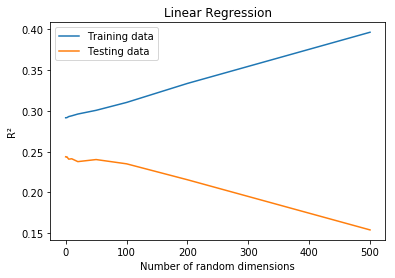

In [9]:
# plot of R2 values over depths
plt.plot(ls_dim, ls_r2_train_lin_regr, label="Training data")
plt.plot(ls_dim, ls_r2_test_lin_regr, label="Testing data")
plt.title('Linear Regression')
plt.xlabel('Number of random dimensions')
plt.ylabel('R²')
plt.legend()
plt.show()

## 3.2 Decision Tree

We automate the process of adding random dimensions to our data set and see how it effects the predictions with the decision tree model. We use the following list of dimension to add: [0, 1, 2, 5, 10, 20, 50, 100, 200, 500]

In [10]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_dec_tree = []
ls_r2_train_dec_tree = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500]

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Convert the column names to strings
    df_wine_noise.columns = df_wine_noise.columns.astype(str)
    # Instantiate Regressor, using max_depth=6, since we already found out in exercise 6 that it is the best setting
    dec_tree = DecisionTreeRegressor(max_depth=6)
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    dec_tree.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = dec_tree.predict(X_test)
    y_pred_train = dec_tree.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_dec_tree.append(r2_test)
    ls_r2_train_dec_tree.append(r2_train)

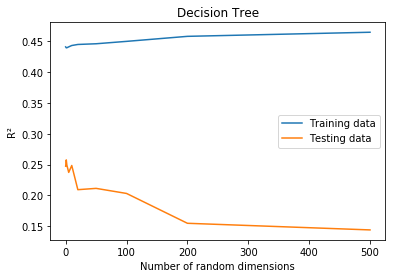

In [11]:
# plot of R2 values over depths
plt.plot(ls_dim, ls_r2_train_dec_tree, label="Training data")
plt.plot(ls_dim, ls_r2_test_dec_tree, label="Testing data")
plt.title('Decision Tree')
plt.xlabel('Number of random dimensions')
plt.ylabel('R²')
plt.legend()
plt.show()

## 3.3 Random Forest
We automate the process of adding random dimensions to our data set and see how it effects the predictions with the random Forests model. We use the following list of dimension to add: [0, 1, 2, 5, 10, 20, 50, 100, 200, 500]. this computtion will take some time.

In [12]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_rf_regr = []
ls_r2_train_rf_regr = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500] 

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Convert the column names to strings
    df_wine_noise.columns = df_wine_noise.columns.astype(str)
    # Instantiate Regressor, restricting n_estimators only to reduce computation time
    rf_regr = RandomForestRegressor(n_estimators=20)
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    rf_regr.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = rf_regr.predict(X_test)
    y_pred_train = rf_regr.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_rf_regr.append(r2_test)
    ls_r2_train_rf_regr.append(r2_train)

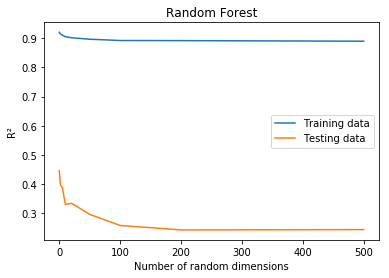

In [13]:
# plot of R2 values over depths
plt.plot(ls_dim, ls_r2_train_rf_regr, label="Training data")
plt.plot(ls_dim, ls_r2_test_rf_regr, label="Testing data")
plt.title('Random Forest')
plt.xlabel('Number of random dimensions')
plt.ylabel('R²')
plt.legend()
plt.show()

# Congrats!

You completed another Exercise! The results show that input dimension that do not carry meaningful information will worsen our prediction results. We also see that some methods are more prone to this effect than others. Namely, the precision of the prediction with decision trees drops very fast with the number of meaningless input dimensions, whereas linear regression is more robust and the precision drops slower. Nevertheless both methods arrive at about 0.15 R² with 500 random input dimensions. RandomForests is the most robust method. Even with 500 random input dimensions, the method can achieve about 0.25 in R².

# 4. Exercise

You already achived a lot by completing the code for the linear regression in point 3.1!

Here are two extra exercises. You can **solve them in this notebook**, no need to create a new one.

 - Add 1000 and more dimensions to all of the three models and run them. 

 - Create a new plot with the outcomes (only testing data necessary) of all three different models in the same graph. Hint: After the first part of this exercise, you already computed all R² values and saved them to lists. You do not need to compute any new values for the plot.

In [14]:
# Initialize empty lists (to be filled with average results afterwards) 
ls_r2_test_lin_regr = [] #####   # Q: why do we need an empty list?
ls_r2_train_lin_regr = [] #####

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000] # Q: what does ls_dim mean?

# Loop over list of random dimensions # how exactly does the loop works?
for dimension in ls_dim: ##### 
    # Create copy of the original df_wine with .copy()
    df_wine_noise = df_wine.copy() #####
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T # Leave this line of code as it is.
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data) #####
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data) #####
    # Instantiate Regressor 
    lin_regr = LinearRegression() # Q: ?
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) #####
    # 2. Fitting the Regression
    lin_regr.fit(X_train, y_train) #####  # Q: ?
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = lin_regr.predict(X_test) #####
    y_pred_train = lin_regr.predict(X_train) #####
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test) ##### # Q: do we compare our actual y Data with the predicted?
    r2_train = r2_score(y_train, y_pred_train) #####
    # 5. Append score to list
    ls_r2_test_lin_regr.append(r2_test) #####
    ls_r2_train_lin_regr.append(r2_train) #####

In [15]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_dec_tree = []
ls_r2_train_dec_tree = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Convert the column names to strings
    df_wine_noise.columns = df_wine_noise.columns.astype(str)
    # Instantiate Regressor, using max_depth=6, since we already found out in exercise 6 that it is the best setting
    dec_tree = DecisionTreeRegressor(max_depth=6)
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    dec_tree.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = dec_tree.predict(X_test)
    y_pred_train = dec_tree.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_dec_tree.append(r2_test)
    ls_r2_train_dec_tree.append(r2_train)

In [16]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_rf_regr = []
ls_r2_train_rf_regr = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000] 

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Convert the column names to strings
    df_wine_noise.columns = df_wine_noise.columns.astype(str)
    # Instantiate Regressor, restricting n_estimators only to reduce computation time
    rf_regr = RandomForestRegressor(n_estimators=20)
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    rf_regr.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = rf_regr.predict(X_test)
    y_pred_train = rf_regr.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_rf_regr.append(r2_test)
    ls_r2_train_rf_regr.append(r2_train)

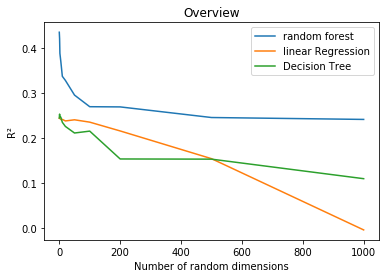

In [18]:
# plot of R2 values over depths
plt.plot(ls_dim, ls_r2_test_rf_regr, label="random forest")
plt.plot(ls_dim, ls_r2_test_lin_regr, label="linear Regression")
plt.plot(ls_dim, ls_r2_test_dec_tree, label="Decision Tree")
plt.title('Overview')
plt.xlabel('Number of random dimensions')
plt.ylabel('R²')
plt.legend()
plt.show()